# Что нужно сделать

Согласно книге "Interpretable Machine Learning. A Guide for Making Black Box Models Explainable" by Christoph Molna,
* Интерпретируемость - это степень, до которой человек может понять причину решения (Interpretability is the degree to which a human can understand the cause of a decision)
* Интерпретируемость - это степень, до которой человек может стабильно предсказывать результат работы модели ( Interpretability is the degree to which a human can consistently predict the model’s result)

Наша задача - объяснить работу Чёрного ящика через методы FCA. В частности - гипотезы и импликации.

Главным образом нам интересны следующие вопросы:
1. Можем ли мы предсказать результат модели зная лишь значения отдельного подмножества признаков? Если да, то насколько уверенными мы можем быть в этом предсказании (сильные и слабые гипотезы)?
2. Исходя из п.1, какие признаки и какие значения признаков наиболее "важны" для Чёрного ящика (насколько они влияют на результат предсказания)?

## Алгоритм работы
1. Бинаризуем исходные данные (каким образом?)
2. Находим структуры, шаблоны в бинаризованных данных - т.е. определяем понятия
3. Определяем результат предсказания для каждого понятия (среднее предсказание для объектов из объёма понятия)
4. Убрать "лишние" ассоциативные связи (асс. связь "лишняя" - если после её применения предсказание понятия меняется меньше, чем на $\delta \rightarrow 0$)
5. Построить решётку понятий

## Объёдинение понятий
### Идея
Пусть есть следующие данные:
$$\text{Признаки} = \{\text{Форма}, \text{Цвет}\}$$
$$\text{Форма} = \{\text{Круглая}, \text{Квадратная}\}$$
$$\text{Цвет} = \{\text{Зелёный}, \text{Салатовый}, \text{Красный}\}$$

Задача бинарной классификации: $$Класс = \{0,1\}$$

Гипотезы:
$$\text{Форма__Круглая} \cap \text{Цвет__Зелёный} \Rightarrow 1$$
$$\text{Форма__Круглая} \cap \text{Цвет__Салатовый} \Rightarrow 1$$

Хотелось бы объединить две гипотезы в одну:
$$\text{Форма__Круглая} \cap \{ \text{Цвет__Зелёный} \cup \text{Цвет__Салатовый} \} \Rightarrow 1$$

Или же даже создать новый признак:
$$\text{Оттенок} = \cases{\text{Зелёный},  \text{если} \text{Цвет} \in \{\text{Зелёный}, \text{Салатовый}\}\\
                          \text{Красный}, \text{если} \text{Цвет} \in \{\text{Красный}\}}$$
 
$$\text{Форма__Круглая} \cap \text{Оттенок__Зелёный} \Rightarrow 1$$

При этом, изначально в датасете не было признака Оттенок, т.е. мы создали его самостоятельно, т.к. он делает модель более интерпретируемой.

### Реализация
#### Вариант 1
Сравнивать все понятия на предмет похожести их содержаний. Если два понятия дают похожий результат предсказания и похожи по содержнию - объединять их.

#### Вариант 2
* Записать все текущие понятия и исходные атрибуты в новый Формальный Контекст.
* Построить на этом контексте монотонные понятия, которые по своей природе объединяют аттрибуты.
* Прочистить получившуюся решётку. Оставить только наиболее общие понятия.
* Визуализировать получившуюся решётку и понятия.

# Пример работы

## Контекст "Манго"

Контекст (вместе с предсказанием модели)
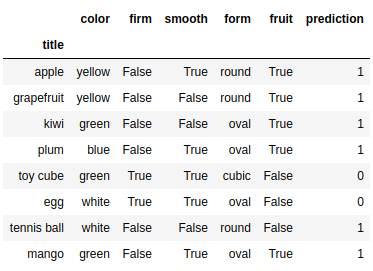

## Анализ гипотез

Решётка понятий
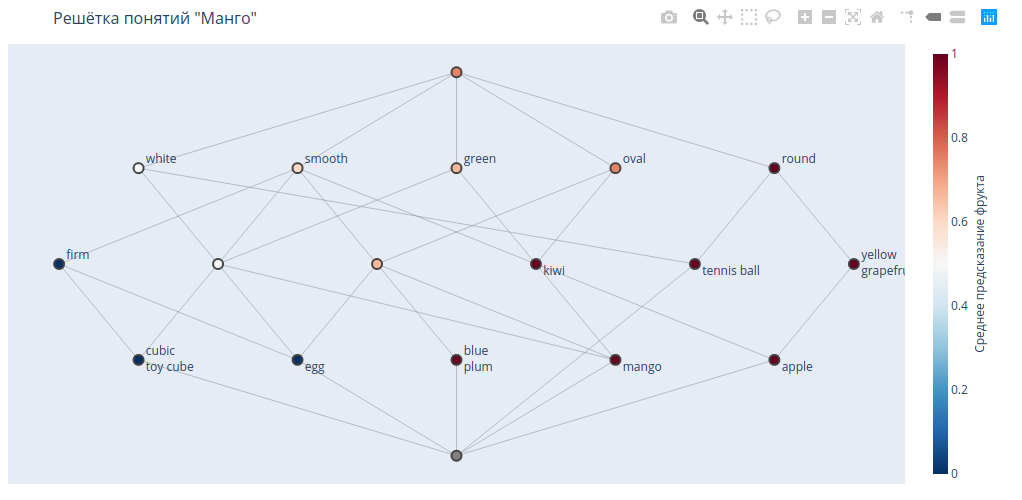

### Список всех гипотез (17\ штук):

-------------------------
__Базовая гипотеза__

* 0: _ -> 0.75

-------------------------
__Позитивные гипотезы__

* **_3: round -> 1.00_**
* **_7: green,oval -> 1.00_**
* **_10: white,round -> 1.00_**
* **_11: yellow,round -> 1.00_**
* **_12: smooth,blue,oval -> 1.00_**
* **_13: smooth,green,oval -> 1.00_**
* **_14: smooth,yellow,round -> 1.00_**

-------------------------
__Отрицательные гипотезы__

* 1: green -> 0.67
* 4: smooth -> 0.60
* 5: white -> 0.50
* **_6: firm,smooth -> 0.00_**
* 8: smooth,green -> 0.50
* 9: smooth,oval -> 0.67
* **_15: firm,smooth,green,cubic -> 0.00_**
* **_16: firm,smooth,white,oval -> 0.00_**

Формат записи:
$$\text{<Номер понятия/гипотезы>}: \text{<содержание гипотезы>} \rightarrow \text{<Среднее предсказание целевого признака>}$$
В нашем случае:
$$\text{<Номер понятия/гипотезы>}: \text{<характеристики объекта>} \rightarrow \text{<вер-ть, что Чёрный ящик назовёт объект фруктом>}$$

__Сильные гипотезы__ (выделены жирным курсивом) в бинарной классификации - те гипотезы, которые определяют целевой признак однозначно в 1 или однозначно в 0. Например:
* 3; round -> 1
* 7; firm $\cap $ smooth $\cap$ green $\cap$ cubic -> 0

__Слабые гипотезы__ в бинарной классификации - те гипотезы, которые не определяют целевой признако однозначно в 1 или однозначно в 0. Например:
* 1: green -> 0.67 (вер-ть что модель определит объект как фрукт - 67%)
* 5: white -> 0.5

### Что хотелось бы улучшить?

Родственные сильные гипотезы (вторая - частный случай первой). Например:
* 3: round -> 1
* 10: white $\cap$ round -> 1
* 11: yellow $\cap$ round -> 1

Гипотезы 10 и 11 являются частными случаями гипотезы №3, приэтом все они - сильные. Поэтому гипотезы 10 и 11 можно исключить из анализа. Аналогично можно поступить с сильными негативными гипотезами 6, 15, 16.

#### Оставшиеся гипотезы (11 штук):

-------------------------
__Базовая гипотеза__

* 0: _ -> 0.75

-------------------------
__Позитивные гипотезы__

* **_3: round -> 1.00_**
* **_7: green,oval -> 1.00_**
* **_12: smooth,blue,oval -> 1.00_**
* **_14: smooth,yellow,round -> 1.00_**

-------------------------
__Отрицательные гипотезы__

* 1: green -> 0.67
* 4: smooth -> 0.60
* 5: white -> 0.50
* **_6: firm,smooth -> 0.00_**
* 8: smooth,green -> 0.50
* 9: smooth,oval -> 0.67

Также, при желании, можно объединить гипотезы 12 и 14:
$$\text{smooth} \cap \left(\text{blue} \cap \text{oval} \bigcup \text{yellow} \cap \text{round} \right) \rightarrow 1$$

## Прореживаем гипотезы автоматически

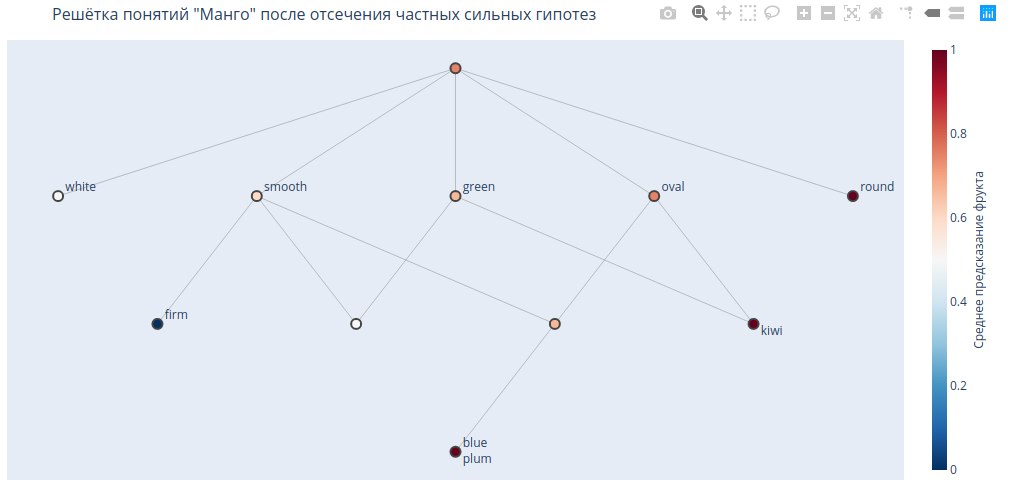

На решётке видно, что после отсечения частных сильных гипотез, некоторые пути в графе остаются "незавершёнными".
Например,
* Понятие 5: (egg, tennis ball; white) -> 0.5

При этом, объект "egg" также встречается в "сильном" понятии 6:
* Понятие 6: (toy cube, egg; firm, smooth) -> 0

Поэтому удалим все пути, которые не приводят к сильным гипотезам. По крайней мере, именно сильные гипотезы нам и интересны.

## Финальный вид решётки понятий Манго

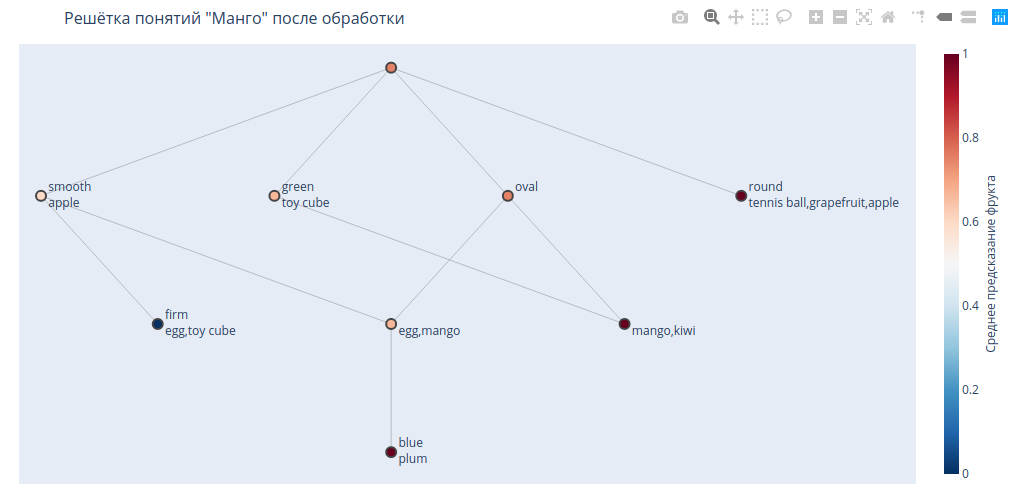

### Оставшиеся гипотезы (8 штук):

-------------------------
__Базовая гипотеза__

* 0: _ -> 0.75

-------------------------
__Позитивные гипотезы__

* **_3: round -> 1.00_**
* **_6: green,oval -> 1.00_**
* **_8: smooth,blue,oval -> 1.00_**

-------------------------
__Отрицательные гипотезы__

* 1: green -> 0.67
* 4: smooth -> 0.60
* **_5: firm,smooth -> 0.00_**
* 7: smooth,oval -> 0.67

__Итого__: мы сократили 17 изначальных гипотез к 8 основным, которые хорошо описывают работу модели Чёрный ящик на имеющихся данных

## Монотонная решётка

Что если текущие гипотезы можно каким-либо образом объединить и т.о. ещё сильнее сократить их количество?

Составим новый Формальный контекст на основе полученных ранее понятий и входящих в них отдельных атрибутов.
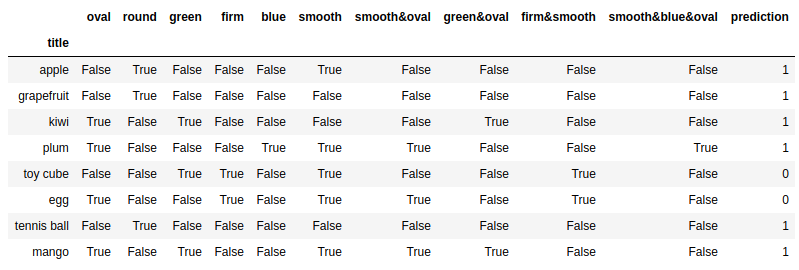

Монотонная решётка:
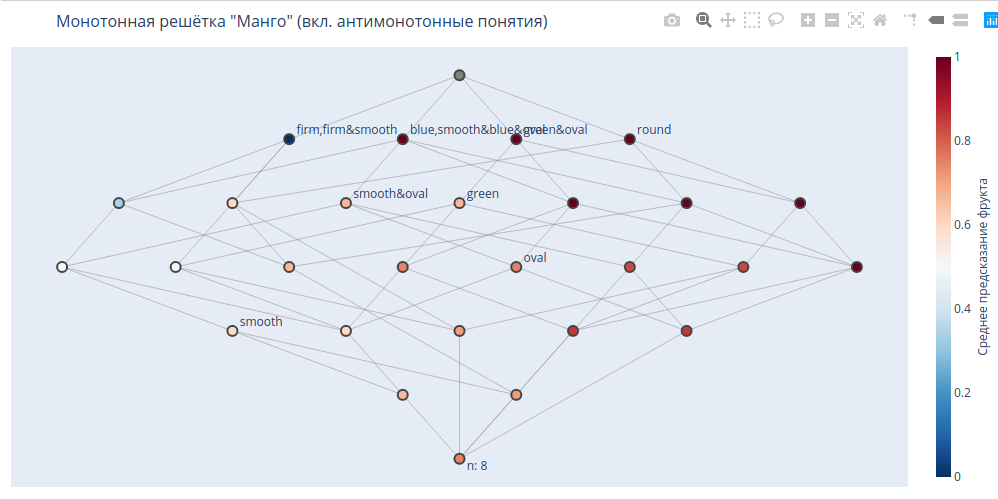

Получилось 28 понятий, поэтому все гипотезы лучше не выводить. Однако, интересно посмотреть на следующие гипотезы:
* $5:  \text{blue} \bigcup \text{smooth} \cap \text{blue} \cap \text{oval} \bigcup \text{green} \cap \text{oval} \rightarrow 1$
* $9: \text{round} \bigcup \text{blue} \bigcup \text{smooth} \cap \text{blue} \cap \text{oval} \rightarrow 1 $
* $11: \text{round} \bigcup \text{green} \cap \text{oval} \rightarrow 1$
------------------
* $15: \text{round} \bigcup \text{blue} \bigcup \text{smooth} \cap \text{blue} \cap \text{oval} \bigcup \text{green} \cap \text{oval} \rightarrow 1$

При этом, гипотеза 15 - ближайщий нижний сосед гипотез 5, 9 и 11.

Перепишем гипотезы с учётом свойств бинарных операций
* $5:  \text{blue} \bigcup \text{green} \cap \text{oval} \rightarrow 1$
* $9: \text{round} \bigcup \text{blue} \rightarrow 1 $
* $11: \text{round} \bigcup \text{green} \cap \text{oval} \rightarrow 1$
----------------------------
* $15: \text{round} \bigcup \text{blue} \bigcup \text{green} \cap \text{oval} \rightarrow 1$

При этом, гипотеза 15 - ближайщий нижний сосед гипотез 5, 9 и 11.

Видно, что одной сложносочинённой гипотезой 15 можно выразить условия гипотез 5, 9, 11. Автоматизируем данный процесс

Алгоритм:
1. Пусть есть два понятия $C_1, C_2$ где $C_2$ - ближайщий нижний сосед $C_1$. Если оба понятия соответствуют сильным гипотезам одинакового знака (полож. или отриц.), то понятие $C_1$ - частное понятие от $C_2$ и его можно удалить.
2. Повторить п.1 пока существуют понятия, удовлетворящие условиям из п.1.
3. Удалить все понятия, соответствующие слабым гипотезам.

Скорее всего существует вариант не удалять все слабые гипотезы, но он пока не придуман.

### Оставшиеся гипотезы (3 штуки):

-------------------------
__Базовая гипотеза__

* $0: \emptyset \rightarrow 0.75$

-------------------------
__Позитивные гипотезы__

* $2: \text{round} \bigcup \text{blue} \bigcup \text{smooth} \cap \text{blue} \cap \text{oval} \bigcup \text{green} \cap \text{oval} \rightarrow 1$

-------------------------
__Отрицательные гипотезы__

* $1: \text{firm} \bigcup \text{firm} \cap \text{smooth} -> 0$

### Оставшиеся гипотезы (после упрощения) (3 штуки):

-------------------------
__Базовая гипотеза__

* $0: \emptyset \rightarrow 0.75$

-------------------------
__Позитивные гипотезы__

* $2: \text{round} \bigcup \text{blue} \bigcup \text{green} \cap \text{oval} \rightarrow 1$

-------------------------
__Отрицательные гипотезы__

* $1: \text{firm} -> 0$

# Итого

Получилось два набора гипотез:
* полученные через антимонотонные понятия (8 штук)
* полученные через комбинацию антимонотонных и монотонных понятий (3 штуки)

-------------------------
__Базовая гипотеза__

* $0: \emptyset \rightarrow 0.75$

-------------------------
__Позитивные гипотезы__

_Антимонотонные_

* $3: \textbf{round} \rightarrow \textbf{1}$
* $6: \textbf{green} \cap \textbf{oval} \rightarrow \textbf{1}$
* $8: \textbf{smooth} \cap \textbf{blue} \cap \textbf{oval} \rightarrow \textbf{1}$

_Монотонные (только сильные)_
* $2: \textbf{round} \bigcup \textbf{blue} \bigcup \textbf{green} \cap \textbf{oval} \rightarrow \textbf{1}$

-------------------------
__Отрицательные гипотезы__

_Антимонотонные_
* $1: \text{green} \rightarrow 0.67$
* $4: \text{smooth} \rightarrow 0.60$
* $5: \textbf{firm} \cap \textbf{smooth} \rightarrow \textbf{0}$
* $7: \text{smooth} \cap \text{oval} \rightarrow 0.67$

_Монотонные (только сильные)_
* $1: \textbf{firm} -> \textbf{0}$

И положительный и отрицательный класс описываются одной составной сильной гипотезой, при этом, все исходные объекты попадают либо под первую, либо под вторую гипотезу. Иначе говоря, предсказания для всех имеющихся объектов можно получить с помощью двух найденных монотонных гипотез.

Почему получилось именно так? Возможно контекст "Манго" слишком прост, т.к. содержит всего 8 объектов. Надо провести похожий анализ на каком-нибудь более реальном, практичном датасете.